# Gráficos do delivey bot

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

## Carregar dados de referência

In [2]:
astar_ref_df = pd.read_csv("./data_ref/ref_astar.csv", delimiter=';')
dijkstra_ref_df = pd.read_csv("./data_ref/ref_dijkstra.csv", delimiter=';')
greedy_best_first_search_ref_df = pd.read_csv("./data_ref/ref_greedy_best_first_search.csv", delimiter=';')

## Carregar dados dos métodos do delivery-bot

In [3]:
astar_csv = glob('./dist/*astar*.csv')
astar_dfs = []
for df in astar_csv:
    astar_dfs.append(pd.read_csv(df).fillna(0))

In [4]:
dijkstra_csv = glob('./dist/*dijkstra*.csv')
dijkstra_dfs = []
for df in dijkstra_csv:
    dijkstra_dfs.append(pd.read_csv(df).fillna(0))

In [5]:
greedy_best_first_search_csv = glob('./dist/*greedy_best_first_search*.csv')
greedy_best_first_search_dfs = []
for df in greedy_best_first_search_csv:
    greedy_best_first_search_dfs.append(pd.read_csv(df).fillna(0))

## Transformar os CSVs em DataFrames

In [6]:
def completar_dicionario(dicionario, tamanho):
    if tamanho == 0:
        return
    
    completar_dicionario(dicionario=dicionario, tamanho=tamanho-1)
    
    if tamanho not in dicionario:
        dicionario[tamanho] = 0
    
    dicionario[tamanho] += 1

In [7]:
astar_dict_len = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0}
media_astar_df = pd.DataFrame(0, index=astar_dfs[0].index, columns=astar_dfs[0].columns)
for df in astar_dfs:
    acao_len = len(df)

    completar_dicionario(dicionario=astar_dict_len, tamanho=acao_len)
        
    if acao_len > len(media_astar_df):
        for i in list(range(acao_len-len(media_astar_df))):
            df_aux = pd.DataFrame({'Passos':[0], 'Pontuação':[0], 'Cargo':[0], 'Bateria':[0], 'Entregas':[0]})
            media_astar_df = pd.concat([media_astar_df, df_aux], ignore_index=True)
    if acao_len < len(media_astar_df):
        for i in list(range(len(media_astar_df)-acao_len)):
            df_aux = pd.DataFrame({'Passos':[0], 'Pontuação':[0], 'Cargo':[0], 'Bateria':[0], 'Entregas':[0]})
            df = pd.concat([df, df_aux], ignore_index=True)
    media_astar_df += df

for i in list(range(len(media_astar_df))):
    media_astar_df.loc[i] = media_astar_df.loc[i]/astar_dict_len[i+1]

/tmp/ipykernel_102284/1431738081.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.56' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  media_astar_df.loc[i] = media_astar_df.loc[i]/astar_dict_len[i+1]
/tmp/ipykernel_102284/1431738081.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-10.56' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  media_astar_df.loc[i] = media_astar_df.loc[i]/astar_dict_len[i+1]
/tmp/ipykernel_102284/1431738081.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '59.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  media_astar_df.loc[i] = media_astar_df.loc[i]/astar_dict_len[i+1]
/tmp/ip

In [8]:
dijkstra_dict_len = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0}
media_dijkstra_df = pd.DataFrame(0, index=dijkstra_dfs[0].index, columns=dijkstra_dfs[0].columns)
for df in dijkstra_dfs:

    completar_dicionario(dicionario=dijkstra_dict_len, tamanho=len(df))
    
    if len(df) > len(media_dijkstra_df):
        for i in list(range(len(df)-len(media_dijkstra_df))):
            df_aux = pd.DataFrame({'Passos':[0], 'Pontuação':[0], 'Cargo':[0], 'Bateria':[0], 'Entregas':[0]})
            media_dijkstra_df = pd.concat([media_dijkstra_df, df_aux], ignore_index=True)
    if len(df) < len(media_dijkstra_df):
        for i in list(range(len(media_dijkstra_df)-len(df))):
            df_aux = pd.DataFrame({'Passos':[0], 'Pontuação':[0], 'Cargo':[0], 'Bateria':[0], 'Entregas':[0]})
            df = pd.concat([df, df_aux], ignore_index=True)
    media_dijkstra_df += df

for i in list(range(len(media_dijkstra_df))):
    media_dijkstra_df.loc[i] = media_dijkstra_df.loc[i]/dijkstra_dict_len[i+1]

/tmp/ipykernel_102284/3020985047.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.56' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  media_dijkstra_df.loc[i] = media_dijkstra_df.loc[i]/dijkstra_dict_len[i+1]
/tmp/ipykernel_102284/3020985047.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-10.56' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  media_dijkstra_df.loc[i] = media_dijkstra_df.loc[i]/dijkstra_dict_len[i+1]
/tmp/ipykernel_102284/3020985047.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '59.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  media_dijkstra_df.loc[i] = media_dijkstra_df.loc[i]/dij

In [9]:
greedy_best_first_search_dict_len = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0}
media_greedy_best_first_search_df = pd.DataFrame(0, index=greedy_best_first_search_dfs[0].index, columns=greedy_best_first_search_dfs[0].columns)
for df in greedy_best_first_search_dfs:
    completar_dicionario(dicionario=greedy_best_first_search_dict_len, tamanho=len(df))
    if len(df) > len(media_greedy_best_first_search_df):
        for i in list(range(len(df)-len(media_greedy_best_first_search_df))):
            df_aux = pd.DataFrame({'Passos':[0], 'Pontuação':[0], 'Cargo':[0], 'Bateria':[0], 'Entregas':[0]})
            media_greedy_best_first_search_df = pd.concat([media_greedy_best_first_search_df, df_aux], ignore_index=True)
    if len(df) < len(media_greedy_best_first_search_df):
        for i in list(range(len(media_greedy_best_first_search_df)-len(df))):
            df_aux = pd.DataFrame({'Passos':[0], 'Pontuação':[0], 'Cargo':[0], 'Bateria':[0], 'Entregas':[0]})
            df = pd.concat([df, df_aux], ignore_index=True)
    media_greedy_best_first_search_df += df

for i in list(range(len(media_greedy_best_first_search_df))):
    media_greedy_best_first_search_df.loc[i] = media_greedy_best_first_search_df.loc[i]/greedy_best_first_search_dict_len[i+1]

/tmp/ipykernel_102284/1868163166.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.82' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  media_greedy_best_first_search_df.loc[i] = media_greedy_best_first_search_df.loc[i]/greedy_best_first_search_dict_len[i+1]
/tmp/ipykernel_102284/1868163166.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-10.82' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  media_greedy_best_first_search_df.loc[i] = media_greedy_best_first_search_df.loc[i]/greedy_best_first_search_dict_len[i+1]
/tmp/ipykernel_102284/1868163166.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '59.14' has dtype incompatible with int64, please expli

In [10]:
medias_dfs = [astar_ref_df, media_astar_df, dijkstra_ref_df, media_dijkstra_df, greedy_best_first_search_ref_df, media_greedy_best_first_search_df]

## Tabela

In [11]:
import pandas as pd

# Lista de dicionários
dicionarios = [
    astar_dict_len,
    dijkstra_dict_len,
    greedy_best_first_search_dict_len,
]

# Criando o DataFrame
df = pd.DataFrame({"A*": astar_dict_len.values(), "Dijkstra":dijkstra_dict_len.values(), "Greedy BFS": greedy_best_first_search_dict_len.values()})

# Imprimindo o DataFrame
df

,A*,Dijkstra,Greedy BFS
0,100,100,100
1,100,100,100
2,100,100,100
3,100,100,100
4,100,100,100
5,100,100,100
6,100,100,100
7,100,100,100
8,99,99,99
9,44,46,52


## 1º Gráfico de comparação dos resultados

In [13]:
valores1 = []
valores2 = []
for df in medias_dfs:
    i = len(df)-1
    valores1.append(df['Passos'][i])
    valores2.append(df['Pontuação'][i])

In [14]:
valores1

[np.float64(116.72),
 np.float64(192.0),
 np.float64(116.72),
 np.float64(192.0),
 np.float64(121.5),
 np.float64(227.0)]

In [15]:
valores2

[np.float64(-89.4),
 np.float64(8.0),
 np.float64(-90.08),
 np.float64(8.0),
 np.float64(-108.54),
 np.float64(-109.66666666666667)]

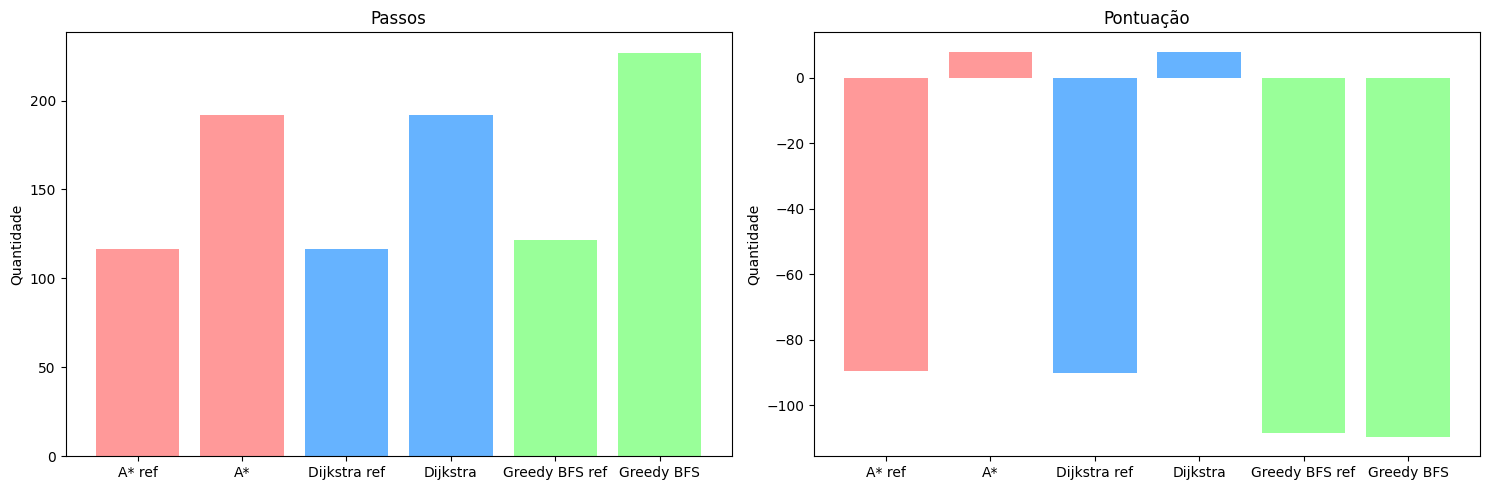

In [16]:
labels = ['A* ref', 'A*', 'Dijkstra ref', 'Dijkstra', 'Greedy BFS ref', 'Greedy BFS']

# Configurar a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# --- Primeiro gráfico de barras ---
ax1.bar(labels, valores1, color=['#ff9999', '#ff9999', '#66b3ff', '#66b3ff', '#99ff99', '#99ff99'])
ax1.set_title('Passos')
ax1.set_ylabel('Quantidade')  # Rótulo do eixo Y

# --- Segundo gráfico de barras ---
ax2.bar(labels, valores2, color=['#ff9999', '#ff9999', '#66b3ff', '#66b3ff', '#99ff99', '#99ff99'])
ax2.set_title('Pontuação')
ax2.set_ylabel('Quantidade')  # Rótulo do eixo Y

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## 2º Gráfico de correlação das variáveis

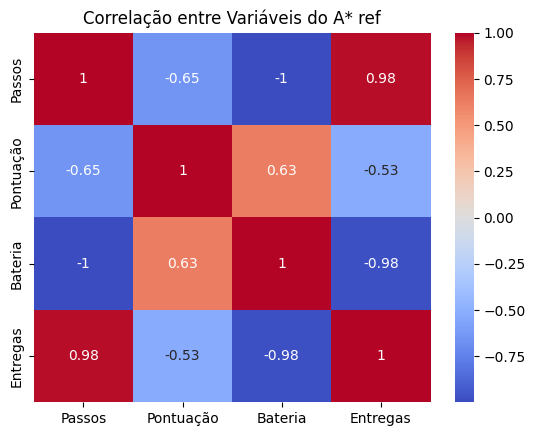

In [17]:
import seaborn as sns
import pandas as pd


data = medias_dfs[0][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis do A* ref')
plt.show()

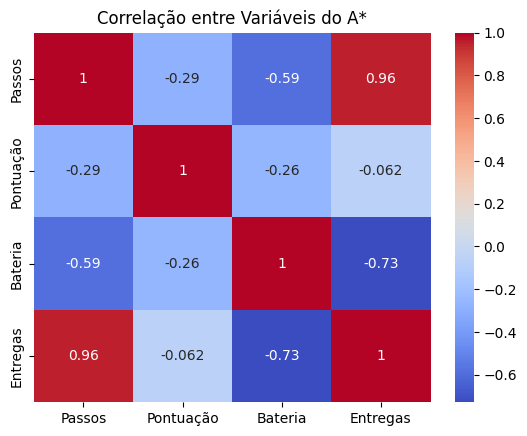

In [18]:
import seaborn as sns
import pandas as pd


data = medias_dfs[1][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis do A*')
plt.show()

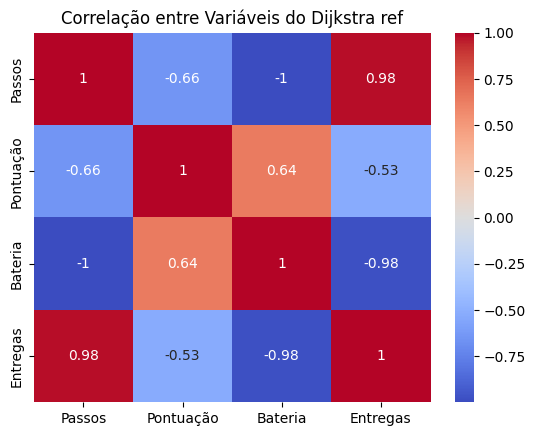

In [19]:
data = medias_dfs[2][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis do Dijkstra ref')
plt.show()

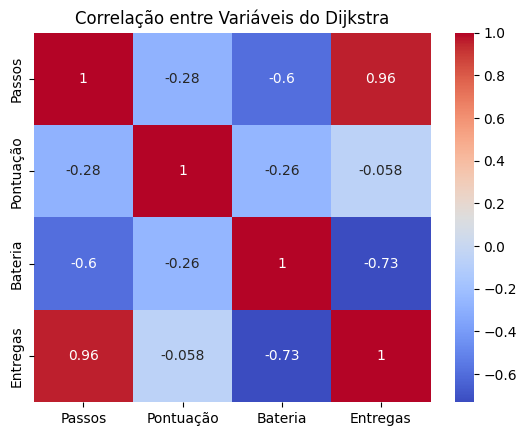

In [20]:
data = medias_dfs[3][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis do Dijkstra')
plt.show()

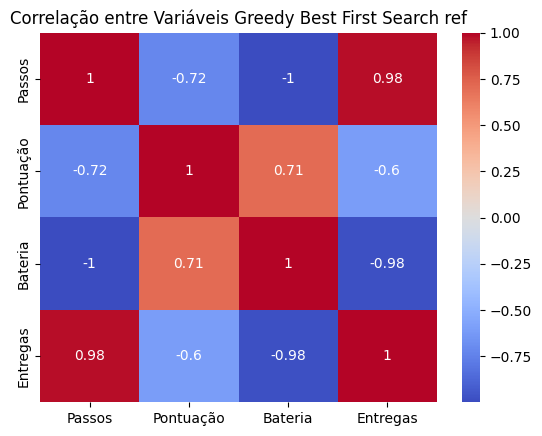

In [21]:
data = medias_dfs[4][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Greedy Best First Search ref')
plt.show()

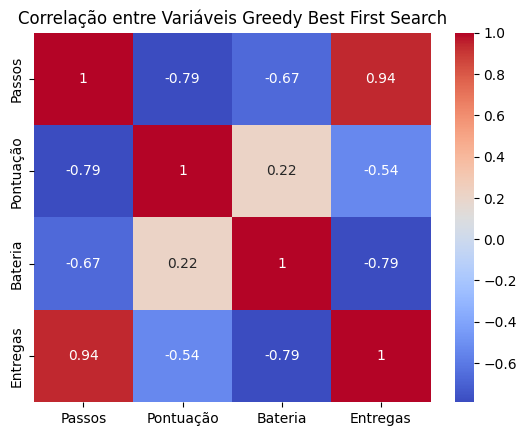

In [22]:
data = medias_dfs[5][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Greedy Best First Search')
plt.show()

## 3º Gráfico de comparação passo a passo

In [23]:
def completar_dados(df, tamanho):
    if tamanho == 0:
        return df

    for _ in range(tamanho):
        ultima_linha = df.iloc[len(df) - 1]
        df_aux = pd.DataFrame([ultima_linha])
        df = pd.concat([df, df_aux], ignore_index=True)

    return df 

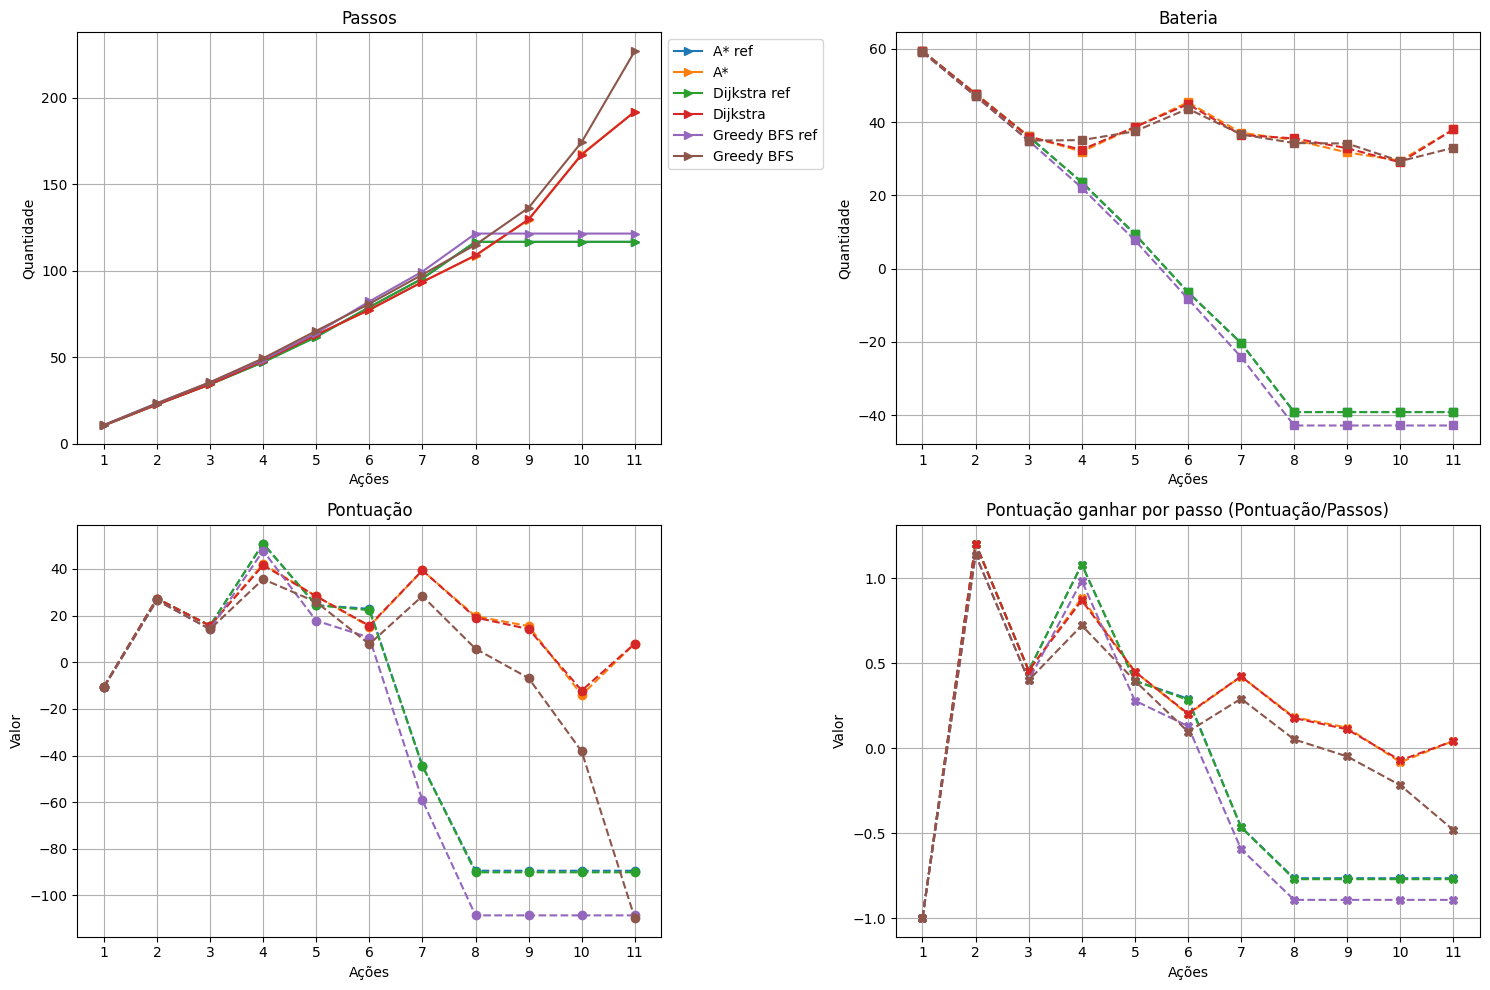

In [24]:
import matplotlib.pyplot as plt
import numpy as np

maior_n_de_acoes = 0
for df in medias_dfs: 
    if len(df) > maior_n_de_acoes:
        maior_n_de_acoes = len(df)

for i, df in enumerate(medias_dfs):
    if len(df) < maior_n_de_acoes:
        diff = maior_n_de_acoes - len(df)
        medias_dfs[i] = completar_dados(df, diff) 

modelos = ['A* ref', 'A*', 'Dijkstra ref', 'Dijkstra', 'Greedy BFS ref', 'Greedy BFS']
momentos = [f'{j}' for j in range(1, maior_n_de_acoes+1)]

# Criar figura com 2 subplots (1 linha, 2 colunas)
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(15, 10))

for i in list(range(len(medias_dfs))):
    ax1.plot(momentos, medias_dfs[i]['Passos'], marker='>', label=modelos[i])
ax1.set_title('Passos')
ax1.set_xlabel('Ações')
ax1.set_ylabel('Quantidade')
ax1.legend(bbox_to_anchor=(1, 1))
ax1.grid(True)

for i in list(range(len(medias_dfs))):
    ax2.plot(momentos, medias_dfs[i]['Bateria'], marker='s', linestyle='--', label=modelos[i])
ax2.set_title('Bateria')
ax2.set_xlabel('Ações')
ax2.set_ylabel('Quantidade')
ax2.grid(True)

plt.tight_layout()

for i in list(range(len(medias_dfs))):
    ax3.plot(momentos, medias_dfs[i]['Pontuação'], marker='o', linestyle='--', label=modelos[i])
ax3.set_title('Pontuação')
ax3.set_xlabel('Ações')
ax3.set_ylabel('Valor')
ax3.grid(True)

for i in list(range(len(medias_dfs))):
    ax4.plot(momentos, medias_dfs[i]['Pontuação'] / medias_dfs[i]['Passos'], marker='X', linestyle='--', label=modelos[i])
ax4.set_title('Pontuação ganhar por passo (Pontuação/Passos)')
ax4.set_xlabel('Ações')
ax4.set_ylabel('Valor')
ax4.grid(True)

plt.tight_layout()
plt.show()

# Gerar seeds para mapas

In [26]:
import random

In [27]:
lista = [random.randint(0, 20000) for _ in range(100)]